In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import cv2
from skimage.color import rgb2gray

Text(0.5, 1.0, 'Original Image')

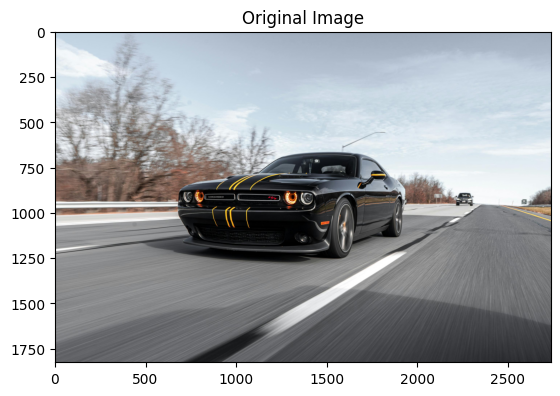

In [29]:
image = io.imread('/content/car.jpg')
plt.imshow(image)
plt.title('Original Image')

Text(0.5, 1.0, 'Grayscale Image')

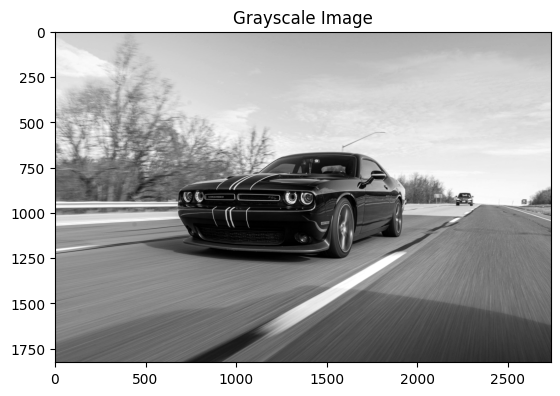

In [30]:
img_gray = rgb2gray(image)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')


Text(0.5, 1.0, 'Denoised Image')

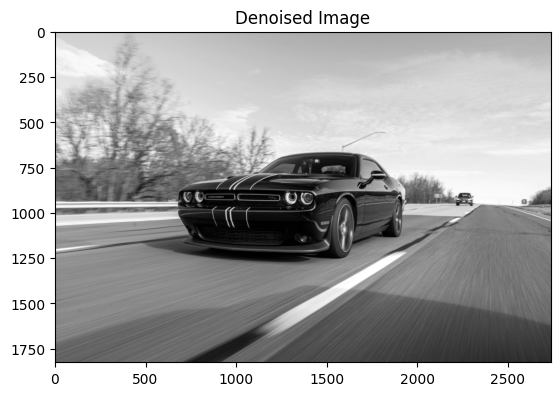

In [31]:
# Apply Gaussian smoothing to remove noise
img = gaussian(img_gray, sigma=1)
plt.imshow(img, cmap='gray')
plt.title('Denoised Image')

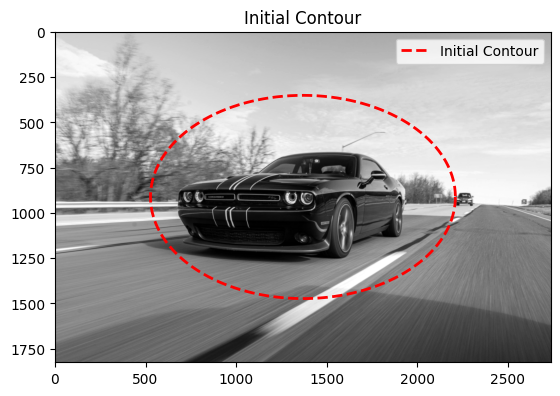

In [32]:
center_row, center_col = img.shape[0] // 2, img.shape[1] // 2
radius = min(img.shape) // 3.25


num_points = 1000
s = np.linspace(0, 2*np.pi, num_points)


width_factor = 1.5
r = center_row + radius * np.sin(s)
c = center_col + radius * width_factor * np.cos(s)
init = np.array([r, c]).T

plt.imshow(img, cmap='gray')
plt.plot(init[:, 1], init[:, 0], '--r', lw=2, label='Initial Contour')
plt.legend(loc='upper right')
plt.title('Initial Contour')
plt.show()



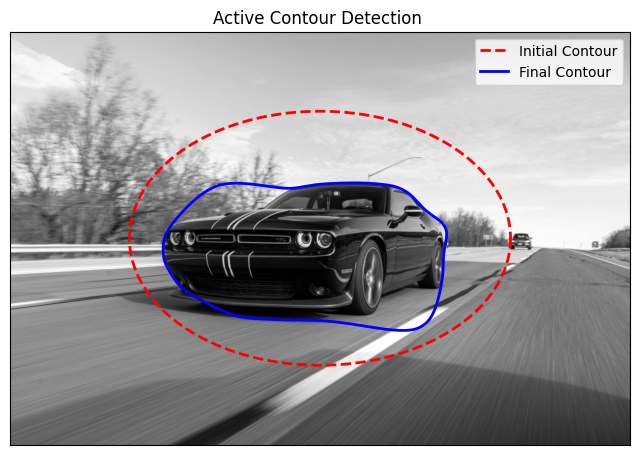

In [33]:
snake = active_contour(
    gaussian(img, sigma=4.5, preserve_range=False),
    init,
    alpha=0.012,  # elasticity
    beta=10,      # rigidity to maintain smooth car curves
    gamma=0.001   # convergence
)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=2, label='Initial Contour')
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=2, label='Final Contour')
ax.set_xticks([])
ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
ax.legend(loc='upper right')
plt.title('Active Contour Detection ')

plt.show()